## Business Understanding

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Library Evaluasi Model
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('data/data_balita.csv')
df

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted
...,...,...,...,...
120994,60,perempuan,100.600000,normal
120995,60,perempuan,98.300000,stunted
120996,60,perempuan,121.300000,normal
120997,60,perempuan,112.200000,normal


In [3]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [4]:
df.tail()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
120994,60,perempuan,100.6,normal
120995,60,perempuan,98.3,stunted
120996,60,perempuan,121.3,normal
120997,60,perempuan,112.2,normal
120998,60,perempuan,109.8,normal


In [5]:
df.sample(10)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
112044,56,perempuan,115.600000,normal
2312,1,laki-laki,54.270803,normal
20724,10,perempuan,65.200000,stunted
61098,31,laki-laki,106.100000,tinggi
115433,58,laki-laki,93.100000,severely stunted
82180,41,perempuan,93.400000,normal
13785,6,perempuan,73.400000,tinggi
83747,42,laki-laki,111.400000,normal
35760,18,laki-laki,89.200000,normal
109948,55,laki-laki,89.100000,severely stunted


In [6]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [7]:
df.describe(include='all')

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
count,120999.000000,120999,120999.000000,120999
unique,NaN,2,NaN,4
top,NaN,perempuan,NaN,normal
freq,NaN,61002,NaN,67755
mean,30.173803,NaN,88.655434,NaN
std,17.575119,NaN,17.300997,NaN
min,0.000000,NaN,40.010437,NaN
25%,15.000000,NaN,77.000000,NaN
50%,30.000000,NaN,89.800000,NaN
75%,45.000000,NaN,101.200000,NaN


In [8]:
# Menampilkan info dari tiap kolom dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Dari kolom dataset diatas dapat diketahui bahwa : 
* Umur :Merupakan umur anak dalam hitungan bulan
* Jenis Kelamin : Jenis Kelamin anak
* Tinggi badan (cm) : Tinggi badan anak dalam centimeter
* Status Gizi : Status gizi yang dikategorikan menjadi 4 status - 'severely stunting', 'stunting', 'normal', dan 'tinggi'. 'Severely stunting' menunjukkan kondisi sangat serius (<-3 SD), 'stunting' menunjukkan kondisi stunting (-3 SD sd <-2 SD), 'normal' mengindikasikan status gizi yang sehat (-2 SD sd +3 SD), dan 'tinggi' (height) menunjukkan pertumbuhan di atas rata-rata (>+3 SD).

### Mengecek nilai null

In [9]:
df.isna().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

tidak nilai null dalam data

### Mengecek Outlier

In [10]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

Umur (bulan)         30.0
Tinggi Badan (cm)    24.2
dtype: float64

In [11]:
# Melihat batas bawah
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

Umur (bulan)        -30.0
Tinggi Badan (cm)    40.7
dtype: float64

In [12]:
# Melihat batas atas
batas_atas = q3 + (1.5 * iqr)
batas_atas

Umur (bulan)          90.0
Tinggi Badan (cm)    137.5
dtype: float64

In [13]:
# Menampung kolom dengan tipe data selain object
df_outlier = df.select_dtypes(exclude=['object'])

# Filter outlier pada dataset dengan batas bawah dan atas
outlier_filter = ((df_outlier < batas_bawah) | (df_outlier > batas_atas))
outlier_filter.sample(10)

,Umur (bulan),Tinggi Badan (cm)
64649,False,False
6703,False,False
31378,False,False
71667,False,False
21779,False,False
49732,False,False
46169,False,False
30643,False,False
60621,False,False
68892,False,False


In [14]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :
    print('Nama Kolom:',col)
    print(outlier_filter[col].value_counts())
    print('-------------------')

Nama Kolom: Umur (bulan)
Umur (bulan)
False    120999
Name: count, dtype: int64
-------------------
Nama Kolom: Tinggi Badan (cm)
Tinggi Badan (cm)
False    120961
True         38
Name: count, dtype: int64
-------------------


<Axes: xlabel='Tinggi Badan (cm)'>

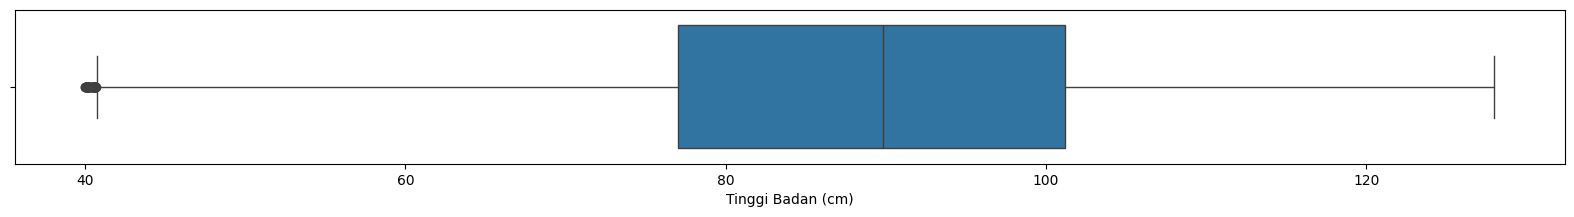

In [15]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df_outlier, x='Tinggi Badan (cm)')

In [16]:
# Memangkas Outlier
df = df[~((df_outlier < q1 - 1.5 * iqr) | (df_outlier > q3 + 1.5 * iqr)).any(axis=1)]

<Axes: xlabel='Tinggi Badan (cm)'>

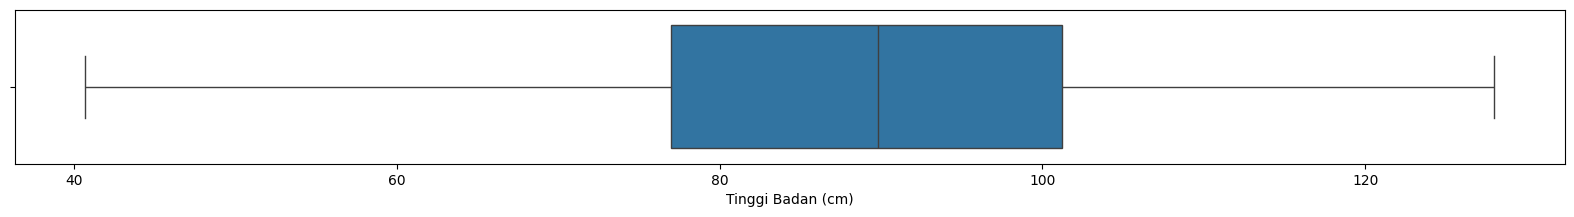

In [17]:
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x='Tinggi Badan (cm)')

data outlier pada kolom tinggi badan sudah dihapus

### Univariate Analysis

In [18]:
numerical_col = df.select_dtypes(exclude='object').columns.to_list()
category_col = df.select_dtypes(exclude =['int64', 'float64']).columns.to_list()

               jumlah sampel  persentase
Jenis Kelamin                           
perempuan              60964        50.4
laki-laki              59997        49.6


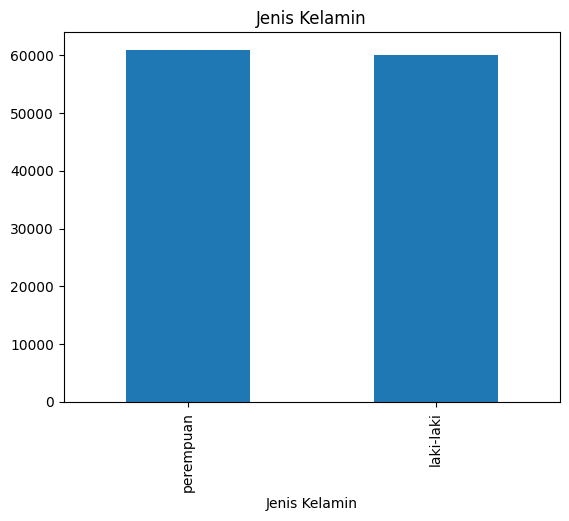

In [19]:
feature = category_col[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_cat)
count.plot(kind='bar', title=feature);

visualisasi data diatas menunjukkan bahwa distribusi gender sangat seimbang yaitu berada kurang lebih 60 ribu data

                  jumlah sampel  persentase
Status Gizi                                
normal                    67755        56.0
severely stunted          19831        16.4
tinggi                    19560        16.2
stunted                   13815        11.4


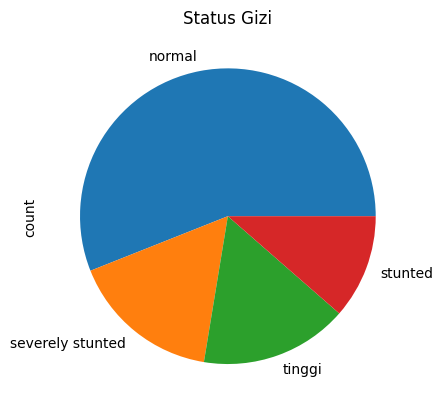

In [20]:
feature = category_col[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cat = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_cat)
count.plot(kind='pie', title=feature);

Dari visualisasi grafik diatas dapat dilihat bahwa lebih dari 50% data memiliki status gizi normal

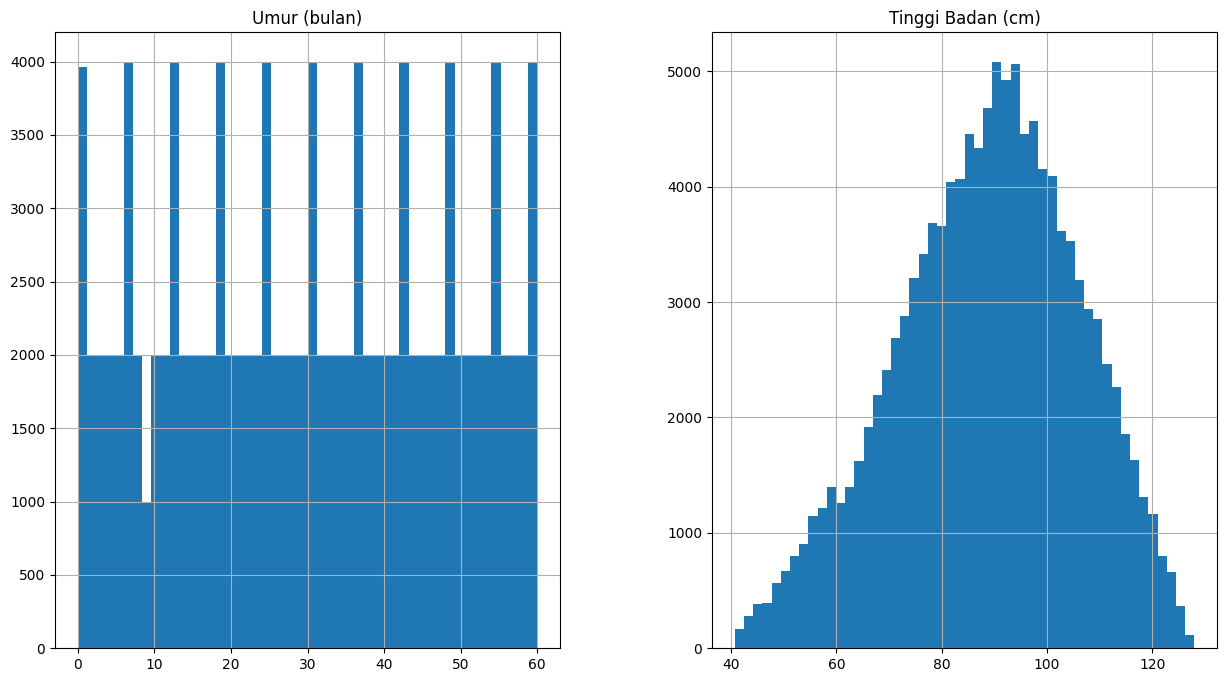

In [21]:
df.hist(bins=50, figsize=(15,8))
plt.show()

* Data umur tampaknya memiliki distribusi yang seragam di setiap interval, kecuali pada beberapa bagian tertentu yang lebih rendah.
* Terdapat gap yang besar pada bagian tertentu data umur, mungkin terjadi karena kesalahan pencatatan atau kelompok umur tertentu tidak terwakili.
* Distribusi data tinggi badan menunjukkan bentuk yang mendekati normal atau distribusi dengan puncak yang berada di sekitar tinggi badan tertentu.
* Dari visualisasi ini, kita bisa mengamati bahwa sebagian besar individu dalam dataset memiliki tinggi badan sekitar 80-100 cm, dan jumlahnya menurun pada tinggi badan yang lebih rendah atau lebih tinggi dari itu.

### Multivariate Analysis

<Axes: xlabel='Status Gizi', ylabel='count'>

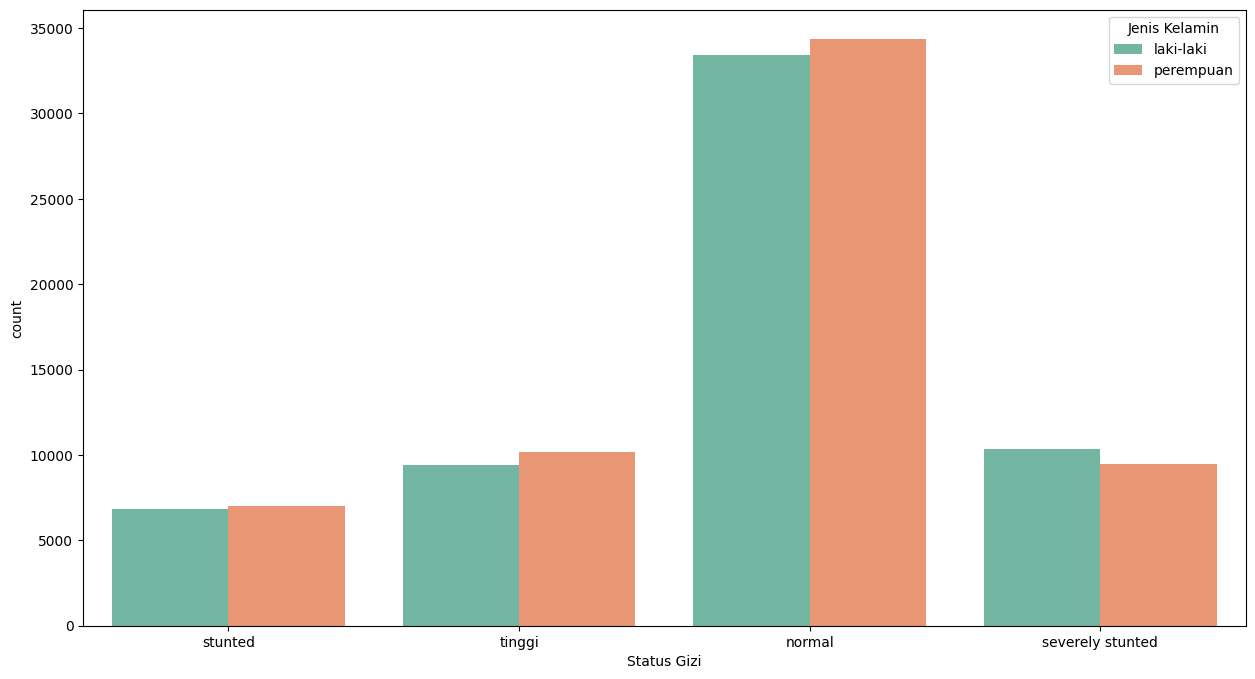

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x="Status Gizi",hue='Jenis Kelamin', data=df, palette="Set2")

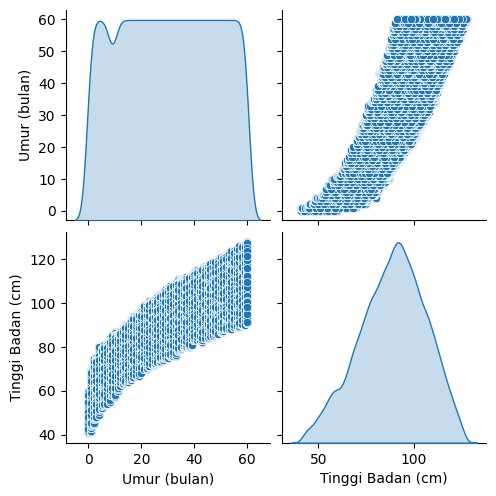

In [23]:
# Mengamati hubungan antar fitur numerik
sns.pairplot(data=df, diag_kind = 'kde')

dari grafik pairplot diatas dapat dilihat bahwa terdapat hubungan yang positif antara umur dan tinggi badan, dimana semakin banyak jumlah umur anak maka tinggi badan mereka juga semakin tinggi. 

## Data Preparation

In [24]:
for i in (category_col) :
    print(df[i].value_counts())
    print("==================")

Jenis Kelamin
perempuan    60964
laki-laki    59997
Name: count, dtype: int64
Status Gizi
normal              67755
severely stunted    19831
tinggi              19560
stunted             13815
Name: count, dtype: int64


#### Label Encoder

In [25]:
encoder = LabelEncoder()
for col in category_col: 
    df[col] = encoder.fit_transform(df[col])

C:\Users\Asus\AppData\Local\Temp\ipykernel_16484\531420647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16484\531420647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])


In [26]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,2
1,0,0,56.705203,3
2,0,0,46.863358,0
3,0,0,47.508026,0
4,0,0,42.743494,1


### Scalling / Standarisasi

In [27]:
scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_16484\2076150020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_col] = scaler.fit_transform(df[numerical_col])


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,-1.71792,0,-2.550491,2
1,-1.71792,0,-1.849592,3
2,-1.71792,0,-2.419063,0
3,-1.71792,0,-2.381761,0
4,-1.71792,0,-2.657448,1


<Axes: >

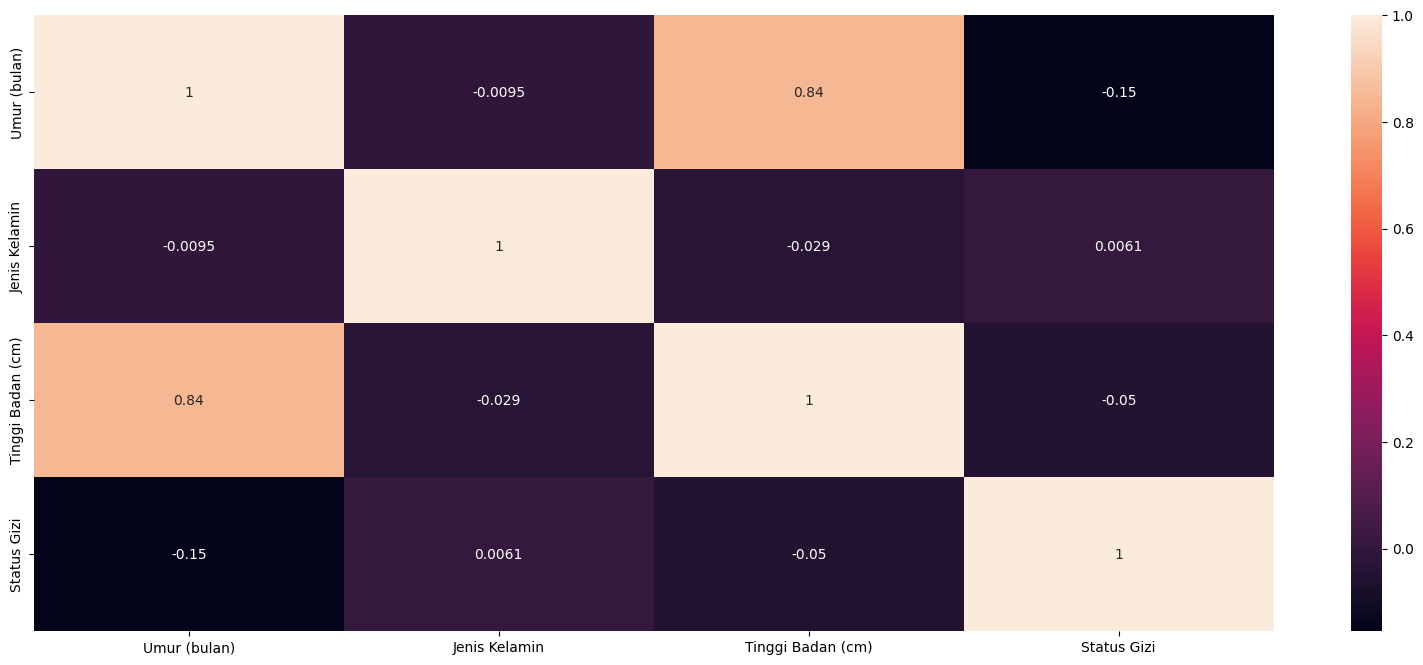

In [28]:
col_corr = df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(col_corr, annot=True)

In [29]:
# Mengambil beberapa sampel data
normal = df[df['Status Gizi'] == 0].sample(5000)
sev = df[df['Status Gizi'] == 1].sample(5000)
stun = df[df['Status Gizi'] == 2].sample(5000)
tinggi = df[df['Status Gizi'] == 3].sample(5000)

df = pd.concat([normal,sev, stun, tinggi],axis=0)
df.shape

(20000, 4)

In [30]:
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print('Panjang data train : ', len(X_train))
print('Panjang data test : ', len(X_test))

Panjang data train :  16000
Panjang data test :  4000


## Modeling

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Akurasi Random Forest :  0.9865
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       995
           1       1.00      0.99      0.99      1024
           2       0.97      0.99      0.98      1004
           3       0.98      1.00      0.99       977

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



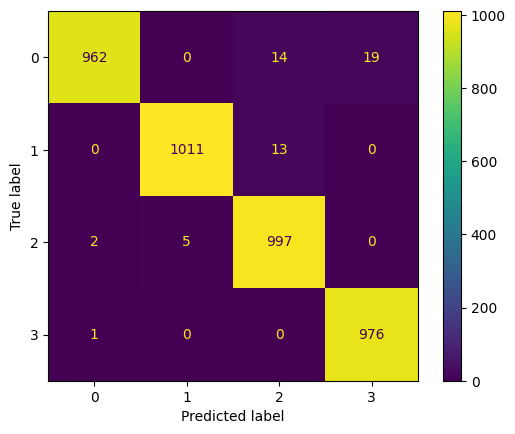

In [34]:
# Mengevaluasi kinerja hasil latih model Random Forest
y_pred_rf = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
print("Akurasi Random Forest : ", accuracy_score(y_test, y_pred_rf))
display_cm = ConfusionMatrixDisplay(cm)
print(classification_report(y_test, y_pred_rf))
display_cm.plot()

### XGBoost

In [35]:
from xgboost import XGBRFClassifier

xgb_model = XGBRFClassifier()
xgb_model.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

Akurasi XGBoost :  0.87975
              precision    recall  f1-score   support

           0       0.99      0.83      0.90       995
           1       0.81      0.90      0.85      1024
           2       0.83      0.79      0.81      1004
           3       0.92      1.00      0.95       977

    accuracy                           0.88      4000
   macro avg       0.89      0.88      0.88      4000
weighted avg       0.88      0.88      0.88      4000



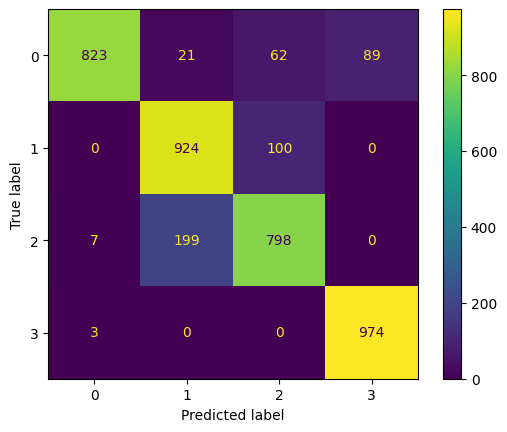

In [36]:
# Mengevaluasi kinerja hasil latih model XGBoost
y_pred_xgb = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_xgb)
print("Akurasi XGBoost : ", accuracy_score(y_test, y_pred_xgb))
display_cm = ConfusionMatrixDisplay(cm)
print(classification_report(y_test, y_pred_xgb))
display_cm.plot()

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

Akurasi Decision Tree :  0.98275
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       995
           1       0.99      0.99      0.99      1024
           2       0.97      0.99      0.98      1004
           3       0.98      0.99      0.99       977

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



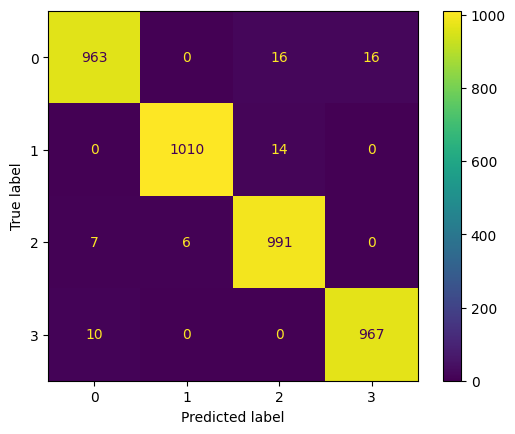

In [38]:
# Mengevaluasi kinerja hasil latih model Decision Tree
y_pred_dtree = dtree_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_dtree)
print("Akurasi Decision Tree : ", accuracy_score(y_test, y_pred_dtree))
display_cm = ConfusionMatrixDisplay(cm)
print(classification_report(y_test, y_pred_dtree))
display_cm.plot()

## Evaluation

Tahap ini merupakan tahap evaluasi terhadap ketiga model yang sudah dibuat untuk dipilih model mana yang terbaik

In [39]:
models = pd.DataFrame(index=['train', 'test'], 
                      columns=['Random Forest', 'XGBoost', 'Decision Tree'])

models.loc['train', 'Random Forest'] = accuracy_score(y_pred=rf_model.predict(X_train), y_true=y_train)
models.loc['train', 'XGBoost'] = accuracy_score(y_pred=xgb_model.predict(X_train), y_true=y_train)
models.loc['train', 'Decision Tree'] = accuracy_score(y_pred=dtree_model.predict(X_train), y_true=y_train)

models.loc['test', 'Random Forest'] = accuracy_score(y_test, y_pred_rf)
models.loc['test', 'XGBoost'] = accuracy_score(y_test, y_pred_xgb)
models.loc['test', 'Decision Tree'] = accuracy_score(y_test, y_pred_dtree)


models

,Random Forest,XGBoost,Decision Tree
train,1.0,0.888813,1.0
test,0.9865,0.87975,0.98275


C:\Users\Asus\AppData\Local\Temp\ipykernel_16484\4053601402.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')


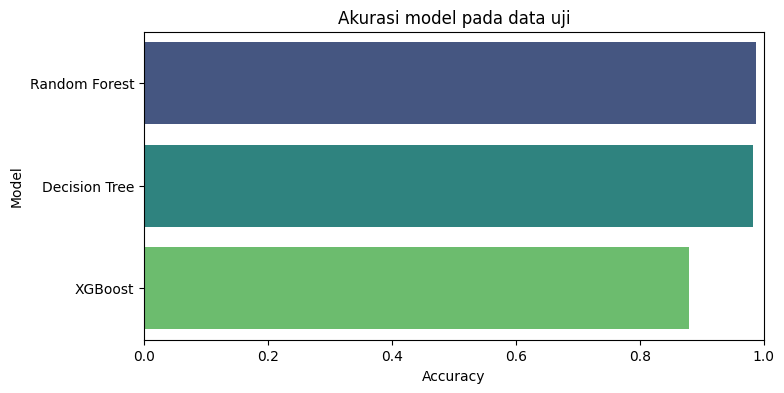

In [40]:
models.transpose()

accuracy_data = models.loc['test'].sort_values(ascending=False).reset_index()
accuracy_data.columns = ['Model', 'Accuracy']

# Membuat plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')
plt.title('Akurasi model pada data uji')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

Dari ketiga model yang sudah dilakukan testing, melalui visualisasi data diatas dapat dilihat bahwa model Random Forest memiliki nilai akurasi tertinggi yang mencapai akurasi 98.7%. Sehingga model inilah yang akan dipilih untuk dilakukan development selanjutnya.